In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# **Problem Statement**
The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.



Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.



With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.



Here, build a sentiment-based product recommendation system, which includes the following tasks.

Data sourcing and sentiment analysis
Building a recommendation system
Improving the recommendations using the sentiment analysis model
Deploying the end-to-end project with a user interface



# Tasks to be Performed for the given sentiment analysis

1.   **Exploratory Data Analysis**
2.   **Data Cleaning**
3.   **Text preprocessing**
4.   **Feature extraction:** In order to extract features from the text data, we may choose from any of the methods, including bag of words, TF-IDF vectorization of word embedding

5.  **Training a text classification model**: we need to build atleast three ML models. we need to analyze the performance of each of these models and choose the best model.
Atleast three out of the following four models need to be built.
   * Logistic Regression
   * Random Forest
   * XGBoost
   * Naive Bayes

out of these models four models, we need to select one clasification model based on this performance.


**BUILDING RECOMMNEDATION SYSTEM**

1. User based recommendation based
2. Item based recommendation based

our task is to analyse the recommendation system and select the one that is best suited in this case..


once after if we get the best suited recommendation system,
the next task is to recommend 20 products that a user is mostly likely to purchase based on the ratings, given we can use reviews_username(columns in the data set) to identify your user..

**IMPROVING THE RECOMMENDATIONS USING THE SENTIMENT ANALYSIS MODEL**

Next task is link this recommendation system with the sentiment analysis model that built earlier.. once you recommend 20 products to a particualr user using the recommenation engine, we need to filter out 5 best products based on the sentiments of the 20 product reviews..
in this way we get an ML model and the best suited recommendation system, after we need to deploy the entire project publically

**Deployment of this end to end project with a user interface**

After getting ML model and the best suited recommendation system, you will deploy the end to end project, we need to use FLASK framework, which is majorly used to reate web applications to deploy machine learning models.
 we need to include the following features in the user interface.

 1. Take any of the existing usernames as input..

 2. create a submit button to submit the username.

 3. once you press the submit button, it should recommend 5 products based on the entered username.


 Note: An important point that you need to consider here is that the number of users and the number of products are fixed in this case study, and you are doing the sentiment analysis and building the recommendation system only for those users who have already submitted the reviews or ratings corresponding to some of the products in the dataset.













**Data Sourcing**

In [ ]:

#mydrive_path= '/content/drive/MyDrive/sentiment_based_product_recommendation/sample30.csv'

**Importing Libraries**

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import re, spacy, string, unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import en_core_web_sm
nlp = en_core_web_sm.load()

%matplotlib inline
# %config InlineBackend.figure_format = 'retina'



from plotly.offline import plot
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score, pairwise_distances
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

In [4]:
import warnings
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)
pd.set_option("display.precision", 2)
pd.set_option('max_colwidth', 500)

## **Loading and Reading the DataSet**

In [5]:
# Reading the input from folder
master_df = pd.read_csv("/Users/sandilya/Desktop/sentiment based product recommendation/sample30.csv")
df=master_df.copy()
df.sample(5)


id              brand  \
20049  AVpfJP1C1cnluZ0-e3Xy             Clorox   
20861  AVpfluP1ilAPnD_xejxO            STACY'S   
11982  AVpf3VOfilAPnD_xjpun             Clorox   
24537  AVpfPaoqLJeJML435Xk9  Warner Home Video   
16202  AVpf63aJLJeJML43F__Q        Burt's Bees   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 categories  \
20049                                                                                                                                                                                 Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery   
20861                                                                                                                                                                                                                                                                                                       Food,Packaged Foods,Snacks,Chips & Pretzels,Food & Beverage,Food & Beverage Ways To Shop,Special Diets,Fresh Food,Deli,Snack Foods,Snacks, Cookies & Chips,Chips,Chips & Crisps   
11982  Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners   
24537                                                                                                                                                                                                                                                                                                                                                                                                 Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys   
16202                                                                                                                                                                                                                                                                                                                                           Personal Care,Makeup,Lipstick, Lip Gloss, & Lip Balm,Lip Gloss,Beauty,Lips,Beauty & Personal Care,Skin Care,Lip Care,Lip Balms & Treatments   

         manufacturer  \
20049  AmazonUs/CLOO7   
20861         Stacy's   
11982          Clorox   
24537            Test   
16202     Burt's Bees   

                                                                  name  \
20049                             Clorox Disinfecting Bathroom Cleaner   
20861                                 Stacy's Simply Naked Bagel Chips   
11982        Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
24537  Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
16202                                  Burt's Bees Lip Shimmer, Raisin   

                   reviews_date reviews_didPurchase reviews_doRecommend  \
20049  2012-01-25T00:00:00.000Z               False                True   
20861  2016-12-15T00:00:00.000Z                True                True   
11982  2015-01-06T00:00:00.0

This dataset consists of 30,000 reviews for more than 200 different products. The reviews and ratings are given by more than 20,000 users.

In [6]:
df.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                                                                                                                                       categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap   
1                                                                                    Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
2                                                                                    Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
3                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
4                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0                 NaN                 NaN               5   
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          reviews_text  \
0                                                                                                                                                                                                                                                                                                            i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                       Good flavor. This review was collected as part of a promotion.   
2                                                                                                                                                                                     

## **Expolatory Data Analysis**
### Data cleaning and Preprocessing


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [8]:
df.isnull().sum() #Missing values sum

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [9]:
### Total reviews
total = len(df['reviews_text'])
print ("Number of reviews: ",total)

### How many unique reviewers?
print ("Number of unique reviewers: ",len(df['reviews_username'].unique()))
reviewer_prop = float(len(df['reviews_username'].unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))

### Average star score
print ("Average rating score: ",round(df['reviews_rating'].mean(),3))


Number of reviews:  30000
Number of unique reviewers:  24915
Prop of unique reviewers:  0.831
Average rating score:  4.483


In [10]:
#data overivew
print('rows: ', df.shape[0])
print('columns: ', df.shape[1])
print('\nfeatures: ', df.columns.to_list())
print('\nmissing vlues: ', df.isnull().values.sum())
print('\nUnique values: \n', df.nunique())

rows:  30000
columns:  15

features:  ['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'user_sentiment']

missing vlues:  74980

Unique values: 
 id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64


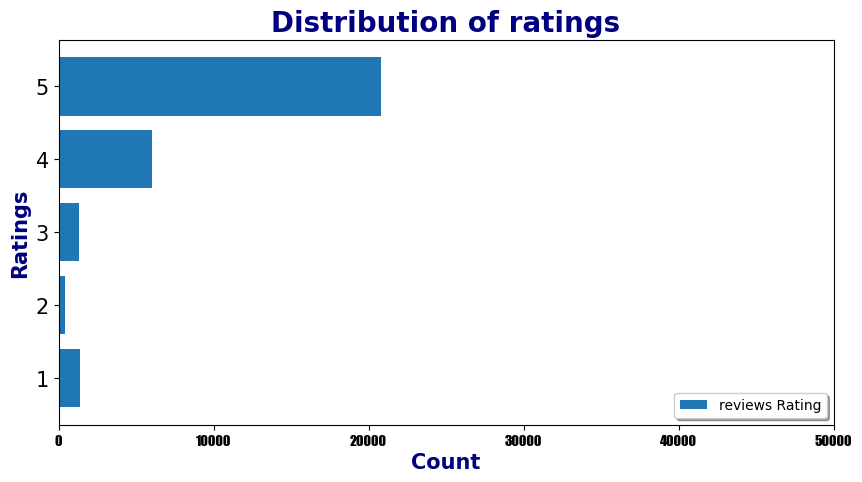

In [11]:
# Number of occurences for each rating
#plot ratings frequency
plt.figure(figsize=[10,5]) #[width, height]
x = list(df['reviews_rating'].value_counts().index)
y = list(df['reviews_rating'].value_counts())
plt.barh(x, y)
ticks_x = np.linspace(0, 50000, 6) # (start, end, no of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks(size=15)

plt.title('Distribution of ratings', fontsize=20, weight='bold', color='navy', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')
plt.legend(['reviews Rating'], shadow=True, loc=4)


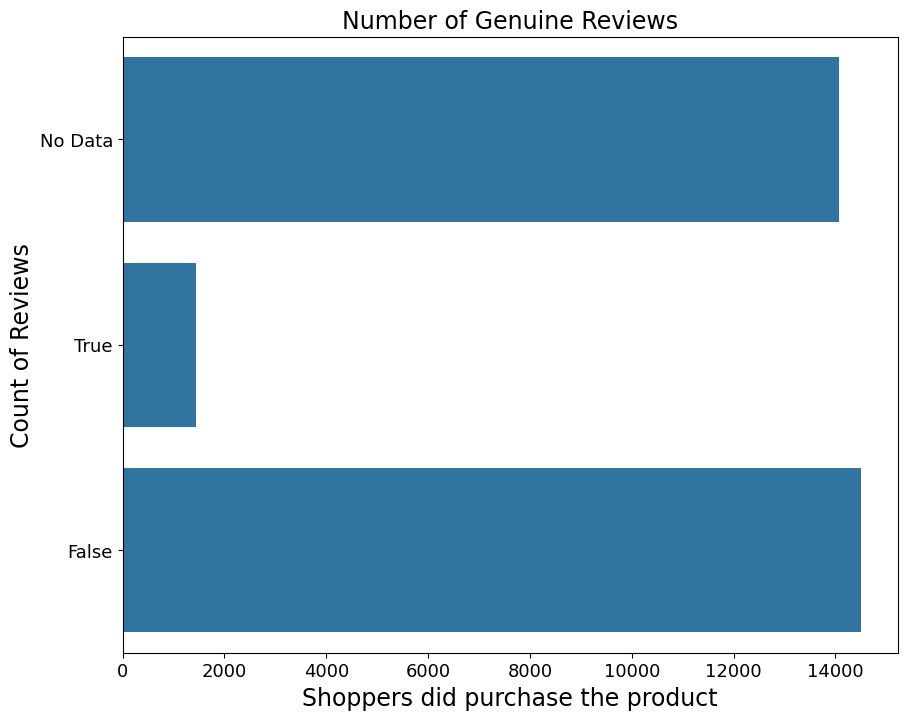

In [12]:


# Number of Postive and Negatives in the data frame showing the class imbalance
#Replace the Nan values to No Data for reviewers did purchase or not
df['reviews_didPurchase'].fillna('No Data', inplace=True)
#Distribution of reviews for actual purchasing customers
plt.figure(figsize=(10,8))
ax = sns.countplot(df['reviews_didPurchase'])
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of Genuine Reviews', fontsize=17)
ax.tick_params(labelsize=13)


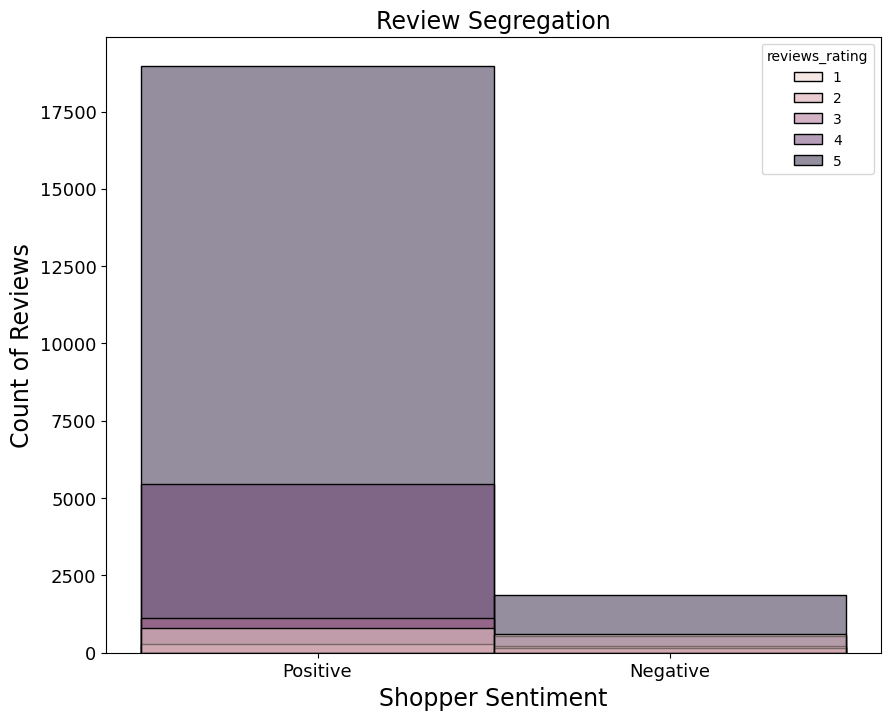

In [13]:
# To see any corrections are required in the dataframe is required using rating and user sentiment
# from IPython.core.pylabtools import figsize
# figsize(10,10)
# sns.histplot(hue=df['reviews_rating'],x=df['user_sentiment'])
# plt.yticks(np.arange(0,30000,10000))
# plt.show()

plt.figure(figsize=(10,8))
ax = sns.histplot(hue=df['reviews_rating'],x=df['user_sentiment'])
ax.set_xlabel(xlabel="Shopper Sentiment", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Review Segregation', fontsize=17)
ax.tick_params(labelsize=13)

In [14]:
df['user_sentiment'].value_counts()

user_sentiment
Positive    26632
Negative     3367
Name: count, dtype: int64

In [15]:


# To download the stopwords from NLTK library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sandilya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

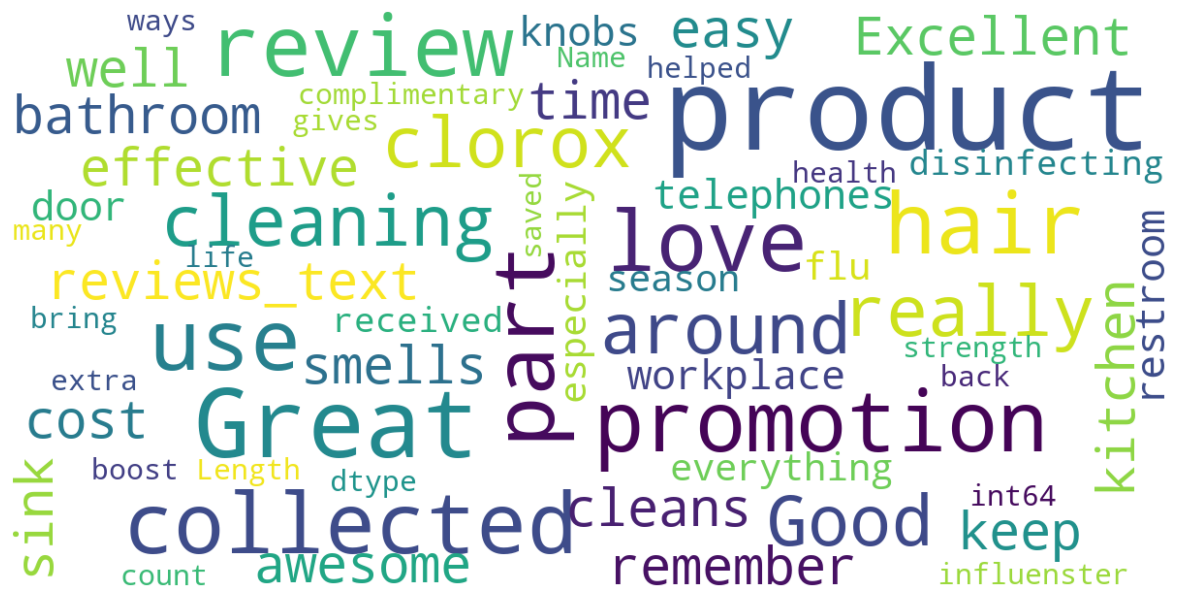

In [16]:
# To Check the most word occurence using word cloud
from wordcloud import WordCloud ,STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40,
                     scale=3, random_state=1).generate(str(df['reviews_text'].value_counts()))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
# Finding the number of rows with Null values
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase         0
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [18]:
#shape of the dataframe
df.shape

(30000, 15)

In [19]:
#From the null values percentages, columns reviews_userCity and reviews_userProvince can be dropped
df = df.drop(columns=['reviews_userCity','reviews_userProvince'],axis=1)
df.head()


id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                                                                                                                                       categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap   
1                                                                                    Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
2                                                                                    Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
3                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
4                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0             No Data                 NaN               5   
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          reviews_text  \
0                                                                                                                                                                                                                                                                                                            i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                       Good flavor. This review was collected as part of a promotion.   
2                                                                                                                                                                                     

In [20]:
# Finding the number of rows with Null values
print("shape of the dataframe =",df.shape)
df.isnull().sum()/len(df)

shape of the dataframe = (30000, 13)


id                     0.00e+00
brand                  0.00e+00
categories             0.00e+00
manufacturer           4.70e-03
name                   0.00e+00
reviews_date           1.53e-03
reviews_didPurchase    0.00e+00
reviews_doRecommend    8.57e-02
reviews_rating         0.00e+00
reviews_text           0.00e+00
reviews_title          6.33e-03
reviews_username       2.10e-03
user_sentiment         3.33e-05
dtype: float64

In [21]:
# Before Updating the user sentiment columns
df['user_sentiment'].value_counts()

user_sentiment
Positive    26632
Negative     3367
Name: count, dtype: int64

In [22]:
# for correcting the user sentiment according to rating
def review_sentiment_clear(x):
  if x >= 3 :
    return 'Postive'
  elif x > 0 and x < 3  :
    return 'Negative'

In [23]:
df['user_sentiment'] = df['reviews_rating'].apply(review_sentiment_clear)
df.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                                                                                                                                       categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap   
1                                                                                    Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
2                                                                                    Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
3                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
4                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0             No Data                 NaN               5   
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          reviews_text  \
0                                                                                                                                                                                                                                                                                                            i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                       Good flavor. This review was collected as part of a promotion.   
2                                                                                                                                                                                     

In [24]:
# After corrections for user sentiment
df['user_sentiment'].value_counts()

user_sentiment
Postive     28196
Negative     1804
Name: count, dtype: int64

# **Text Preprocessing**

In [25]:
#Common functions for cleaning the text data
import nltk
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import html

# special_characters removal
def remove_special_characters(text, remove_digits=True):
    """Remove the special Characters"""
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

stopword_list= stopwords.words('english')



def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

[nltk_data] Downloading package punkt to /Users/sandilya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sandilya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sandilya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sandilya/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [26]:
def normalize_and_lemmaize(input_text):
    input_text = remove_special_characters(input_text)
    words = nltk.word_tokenize(input_text)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [27]:
# Take the Review comment and user sentiment as dataframe
review_df = df[['reviews_text','user_sentiment']]
review_df.head()

reviews_text  \
0                                                                                                                                                                                                                                                                                                            i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                       Good flavor. This review was collected as part of a promotion.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Good flavor.   
3  I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...   
4                                                                                                                                                                                                                                                                                                                                                                                 My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.   

  user_sentiment  
0        Postive  
1        Postive  
2        Postive  
3       Negative  
4       Negative

In [28]:
# create a new column lemmatized_review using the emmatize_text function
review_df['lemmatized_text'] = review_df['reviews_text'].map(lambda text: normalize_and_lemmaize(text))
review_df.head()


reviews_text  \
0                                                                                                                                                                                                                                                                                                            i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                       Good flavor. This review was collected as part of a promotion.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Good flavor.   
3  I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...   
4                                                                                                                                                                                                                                                                                                                                                                                 My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.   

  user_sentiment  \
0        Postive   
1        Postive   
2        Postive   
3       Negative   
4       Negative   

                                                                                                                                                                                                                                                                                                                                                                                               lemmatized_text  
0                                                                                                                                                                                                                                                                                                    love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy  
1                                                                                                                                                                                                                                                                                                                                                                    good flavor review collect part promotion  
2                                                                                                                                

In [29]:
# new dataframe with lemmatized text and user sentiment
review_new_df = review_df[['lemmatized_text','user_sentiment']]
review_new_df

lemmatized_text  \
0                                                                                                                                                                                                                                                                                                        love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy   
1                                                                                                                                                                                                                                                                                                                                                                        good flavor review collect part promotion   
2                                                                                                                                                                                                                                                                                                                                                                                                      good flavor   
3      read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess   
4                                                                                                                                                                                                                                                                                                                                husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel   
...                                                                                                                                                                                                                                                                                                                                                                                                            ...   
29995                                                                                                                                                                                                                                                                                        get conditioner influenster try im love far oily hair use end hair feel amaze soft mess review collect part promotion   
29996                                                                                                                                                                                                                                                                                                                                    love receive review purpose influenster leave hair feel fresh smell great   
29997                                                                                                                                                                                                                                                                         first love smell product wash hair smooth easy brush receive product influenster test purpose opinions review collect part promotion   
29998                                                                                                                                                                                                         receive influenster never go back anything else normally dont use conditioner hair oily fine make hair feel heavy doesnt 

In [30]:
#Encode the negative and postive to 0 and 1 respectively
review_new_df['user_sentiment'] = review_new_df['user_sentiment'].map({'Negative':0,'Postive':1})
review_new_df.head()

lemmatized_text  \
0                                                                                                                                                                                                                                                                                                    love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy   
1                                                                                                                                                                                                                                                                                                                                                                    good flavor review collect part promotion   
2                                                                                                                                                                                                                                                                                                                                                                                                  good flavor   
3  read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess   
4                                                                                                                                                                                                                                                                                                                            husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel   

   user_sentiment  
0               1  
1               1  
2               1  
3               0  
4               0

In [33]:
pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.4 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.10/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


**Splitting this data in training data and testing data**

In [34]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [35]:
x_train, x_test, y_train, y_test = train_test_split(review_new_df['lemmatized_text'], review_new_df['user_sentiment'], train_size= 0.75, random_state =45, stratify = review_new_df['user_sentiment'])
# Train and Test Divide
#x_train,x_test,y_train,y_test = train_test_split(review_new_df['lemmatized_text'],review_new_df['user_sentiment'],train_size=0.75,random_state=45,stratify=review_new_df['user_sentiment'])
y_train.value_counts()

user_sentiment
1    21147
0     1353
Name: count, dtype: int64

# **Feature Extraction Count Vectorizer and TFIDF Transformer**

### In order to extract features from the text data, you may choose from any of the methods, including bag-of-words, TF-IDF vectorization or word embedding.

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
x_count = count_vect.fit_transform(x_train)

tfidf_transformer = TfidfTransformer()
x_train_transformed = tfidf_transformer.fit_transform(x_count)
x_train_transformed.shape

(22500, 14711)

In [38]:
# creating the pickle for count vectorizer and TFIDF TRANSFORMER

import os
import pickle

# Define the directory path
#dir_path = '/content/drive/MyDrive/sentiment_based_product_recommendation/pickle_file/'
dir_path = "/Users/sandilya/Desktop/sentiment based product recommendation/"
# Create the directory if it doesn't exist
os.makedirs(dir_path, exist_ok=True)

# Save the count vectorizer and TFIDF transformer
pickle.dump(count_vect, open(os.path.join(dir_path, 'count_vector.pkl'), 'wb'))
pickle.dump(tfidf_transformer, open(os.path.join(dir_path, 'tfidf_transformer.pkl'), 'wb'))







#pickle.dump(count_vect, open('/content/drive/MyDrive/sentiment_based_product_recommendation/pickle_file/count_vector.pkl', 'wb'))
#pickle.dump(tfidf_transformer, open('/content/drive/MyDrive/sentiment_based_product_recommendation/pickle_file/tfidf_transformer.pkl', 'wb'))



In [39]:
count = Counter(y_train)
print('Before sampling :',count)

sampler = SMOTE()

x_train_sm,y_train_sm = sampler.fit_resample(x_train_transformed,y_train)

count = Counter(y_train_sm)
print('After sampling :',count)

Before sampling : Counter({1: 21147, 0: 1353})
After sampling : Counter({1: 21147, 0: 21147})


# **Training a text classification model**

1. Random Forest classifier
2. XGBoost
3. Logistic Regression




In [40]:
# Function for metrics

performance = []

def model_metrics(y,y_pred,model_name,metrics):
  Accuracy = accuracy_score(y,y_pred)
  Precision = precision_score(y,y_pred)
  Recall = recall_score(y,y_pred)
  f1 = f1_score(y,y_pred)
  roc = roc_auc_score(y,y_pred)
  confusion = confusion_matrix(y,y_pred)


  TP = confusion[1,1] # true positive
  TN = confusion[0,0] # true negatives
  FP = confusion[0,1] # false positives
  FN = confusion[1,0] # false negatives

  sensitivity = TP / float(TP+FN)
  specificity = TN / float(TN+FP)

  #performance.append([model_name,Accuracy,Precision,Recall,f1,roc,senstivity,specificity])

  print("*"*50)
  print('Confusion Matrix =')
  print(confusion)
  print("sensitivity of the %s = %f" % (model_name,round(sensitivity,2)))
  print("specificity of the %s = %f" % (model_name,round(specificity,2)))
  print("Accuracy Score of %s = %f" % (model_name,Accuracy))
  print('ROC AUC score of %s = %f' % (model_name,roc))
  print("Report=",)
  print(classification_report(y,y_pred))
  print("*"*50)
  metrics.append(dict({'Model_name':model_name,
                       'Accuracy':Accuracy,
                       'Roc_auc_score':roc,
                       'Precision':Precision,
                       'F1_score':f1}))
  return metrics



## **Logistic Regression**

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_sm,y_train_sm)

LogisticRegression()

In [42]:
y_pred = lr.predict(x_train_sm)
performance = model_metrics(y_train_sm,y_pred,'Logistic Regression',performance)

**************************************************
Confusion Matrix =
[[20822   325]
 [  605 20542]]
sensitivity of the Logistic Regression = 0.970000
specificity of the Logistic Regression = 0.980000
Accuracy Score of Logistic Regression = 0.978011
ROC AUC score of Logistic Regression = 0.978011
Report=
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     21147
           1       0.98      0.97      0.98     21147

    accuracy                           0.98     42294
   macro avg       0.98      0.98      0.98     42294
weighted avg       0.98      0.98      0.98     42294

**************************************************


## **Random forest classifier**


In [43]:
rf = RandomForestClassifier()
rf.fit(x_train_sm,y_train_sm)


RandomForestClassifier()

In [44]:
y_pred_rf = rf.predict(x_train_sm)
performance = model_metrics(y_train_sm,y_pred_rf,'RandomForestClassifier',performance)


**************************************************
Confusion Matrix =
[[21146     1]
 [    2 21145]]
sensitivity of the RandomForestClassifier = 1.000000
specificity of the RandomForestClassifier = 1.000000
Accuracy Score of RandomForestClassifier = 0.999929
ROC AUC score of RandomForestClassifier = 0.999929
Report=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21147
           1       1.00      1.00      1.00     21147

    accuracy                           1.00     42294
   macro avg       1.00      1.00      1.00     42294
weighted avg       1.00      1.00      1.00     42294

**************************************************


## **AdaBoost Classifier**

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

xgba = GradientBoostingClassifier()
xgba.fit(x_train_sm,y_train_sm)
y_pred_xgb = xgba.predict(x_train_sm)
performance = model_metrics(y_train_sm,y_pred_rf,'AdaBoostclassifier',performance)

**************************************************
Confusion Matrix =
[[21146     1]
 [    2 21145]]
sensitivity of the AdaBoostclassifier = 1.000000
specificity of the AdaBoostclassifier = 1.000000
Accuracy Score of AdaBoostclassifier = 0.999929
ROC AUC score of AdaBoostclassifier = 0.999929
Report=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21147
           1       1.00      1.00      1.00     21147

    accuracy                           1.00     42294
   macro avg       1.00      1.00      1.00     42294
weighted avg       1.00      1.00      1.00     42294

**************************************************


## **XGBoost**

In [46]:
import xgboost as xgb

In [47]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train_sm,y_train_sm)
y_pred_xgbc = xgb_classifier.predict(x_train_sm)
performance = model_metrics(y_train_sm,y_pred_xgbc,'XGBClassifier',performance)


**************************************************
Confusion Matrix =
[[20813   334]
 [  116 21031]]
sensitivity of the XGBClassifier = 0.990000
specificity of the XGBClassifier = 0.980000
Accuracy Score of XGBClassifier = 0.989360
ROC AUC score of XGBClassifier = 0.989360
Report=
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     21147
           1       0.98      0.99      0.99     21147

    accuracy                           0.99     42294
   macro avg       0.99      0.99      0.99     42294
weighted avg       0.99      0.99      0.99     42294

**************************************************


In [48]:
metrics_df = pd.DataFrame(performance)
metrics_df

Model_name  Accuracy  Roc_auc_score  Precision  F1_score
0     Logistic Regression      0.98           0.98       0.98      0.98
1  RandomForestClassifier      1.00           1.00       1.00      1.00
2      AdaBoostclassifier      1.00           1.00       1.00      1.00
3           XGBClassifier      0.99           0.99       0.98      0.99

## **Hyperparameter Tuning models**

In [49]:
n_estimators = [200,400,600]
max_depth = [6,10,15]
min_samples_leaf = [5,6,8]
criterion  = ['gini','entropy']
params = {'n_estimators':n_estimators,
          'max_depth':max_depth,
          'min_samples_leaf': min_samples_leaf,
          'criterion':criterion}

In [50]:
grid_cv = GridSearchCV(estimator=rf,
                       param_grid=params,
                       n_jobs = -1,
                       scoring = 'roc_auc',
                       verbose = 1)

In [51]:
grid_cv.fit(x_train_sm,y_train_sm)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 10, 15],
                         'min_samples_leaf': [5, 6, 8],
                         'n_estimators': [200, 400, 600]},
             scoring='roc_auc', verbose=1)

In [52]:
rf_final=grid_cv.best_estimator_
rf_final


RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=400)

In [53]:
pickle.dump(rf_final,open(os.path.join(dir_path,'RandomForest_classifier.pkl'),'wb'))

In [54]:

grid_cv.best_score_

0.9778643880412223

In [55]:
y_pred_rfgcv = rf_final.predict(x_train_sm)
performance = model_metrics(y_train_sm,y_pred_rfgcv,'RandomForestClassifier with hyperparmater',performance)

**************************************************
Confusion Matrix =
[[17889  3258]
 [  626 20521]]
sensitivity of the RandomForestClassifier with hyperparmater = 0.970000
specificity of the RandomForestClassifier with hyperparmater = 0.850000
Accuracy Score of RandomForestClassifier with hyperparmater = 0.908167
ROC AUC score of RandomForestClassifier with hyperparmater = 0.908167
Report=
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     21147
           1       0.86      0.97      0.91     21147

    accuracy                           0.91     42294
   macro avg       0.91      0.91      0.91     42294
weighted avg       0.91      0.91      0.91     42294

**************************************************


In [56]:
n_estimators = [200,400,600]
params_1 = {'n_estimators':n_estimators}

In [57]:
grid_cv_boost = GridSearchCV(estimator=xgba,
                       param_grid=params_1,
                       n_jobs = -1,
                       scoring = 'roc_auc',
                       verbose = 1)

In [58]:
grid_cv_boost.fit(x_train_sm,y_train_sm)
print('Best score for GradientBoosting=',grid_cv_boost.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best score for GradientBoosting= 0.9954822679980838


In [59]:
xgb_final=grid_cv_boost.best_estimator_
xgb_final

GradientBoostingClassifier(n_estimators=600)

In [60]:
y_pred_xgbgcv = xgb_final.predict(x_train_sm)
performance = model_metrics(y_train_sm,y_pred_xgbgcv,'GradientBoostClassifier with n = 600',performance)

**************************************************
Confusion Matrix =
[[20746   401]
 [  336 20811]]
sensitivity of the GradientBoostClassifier with n = 600 = 0.980000
specificity of the GradientBoostClassifier with n = 600 = 0.980000
Accuracy Score of GradientBoostClassifier with n = 600 = 0.982574
ROC AUC score of GradientBoostClassifier with n = 600 = 0.982574
Report=
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     21147
           1       0.98      0.98      0.98     21147

    accuracy                           0.98     42294
   macro avg       0.98      0.98      0.98     42294
weighted avg       0.98      0.98      0.98     42294

**************************************************


In [61]:
max_depth = [5,6,7,10]

params_2 = {'max_depth':max_depth
}
grid_cv_boost2 = GridSearchCV(estimator=xgb_final,
                       param_grid=params_2,
                       n_jobs = -1,
                       scoring = 'roc_auc',
                       verbose = 1)

In [62]:
grid_cv_boost2.fit(x_train_sm,y_train_sm)
print('Best score for GradientBoosting=',grid_cv_boost2.best_score_)
grid_cv_boost2.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best score for GradientBoosting= 0.998426379431818


GradientBoostingClassifier(max_depth=10, n_estimators=600)

In [63]:
min_samples_split = [10,20,30]
params_2 = {'min_samples_split': min_samples_split
}
grid_cv_boost3 = GridSearchCV(estimator=grid_cv_boost2.best_estimator_,
                       param_grid=params_2,
                       n_jobs = -1,
                       scoring = 'roc_auc',
                       verbose = 1)

grid_cv_boost3.fit(x_train_sm,y_train_sm)
print('Best score for GradientBoosting=',grid_cv_boost3.best_score_)
grid_cv_boost3.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best score for GradientBoosting= 0.9984614599792664


GradientBoostingClassifier(max_depth=10, min_samples_split=10, n_estimators=600)

In [64]:
y_pred_xgbgcv2 = grid_cv_boost3.best_estimator_.predict(x_train_sm)
performance = model_metrics(y_train_sm,y_pred_xgbgcv2,'GradientBoostClassifier with param2',performance)
performance

**************************************************
Confusion Matrix =
[[21140     7]
 [    0 21147]]
sensitivity of the GradientBoostClassifier with param2 = 1.000000
specificity of the GradientBoostClassifier with param2 = 1.000000
Accuracy Score of GradientBoostClassifier with param2 = 0.999834
ROC AUC score of GradientBoostClassifier with param2 = 0.999834
Report=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21147
           1       1.00      1.00      1.00     21147

    accuracy                           1.00     42294
   macro avg       1.00      1.00      1.00     42294
weighted avg       1.00      1.00      1.00     42294

**************************************************


[{'Model_name': 'Logistic Regression',
  'Accuracy': 0.9780110653993475,
  'Roc_auc_score': 0.9780110653993473,
  'Precision': 0.9844251689270139,
  'F1_score': 0.9778645213500261},
 {'Model_name': 'RandomForestClassifier',
  'Accuracy': 0.9999290679529012,
  'Roc_auc_score': 0.999929067952901,
  'Precision': 0.9999527097323371,
  'F1_score': 0.999929066275743},
 {'Model_name': 'AdaBoostclassifier',
  'Accuracy': 0.9999290679529012,
  'Roc_auc_score': 0.999929067952901,
  'Precision': 0.9999527097323371,
  'F1_score': 0.999929066275743},
 {'Model_name': 'XGBClassifier',
  'Accuracy': 0.9893601929351681,
  'Roc_auc_score': 0.9893601929351681,
  'Precision': 0.9843669553007255,
  'F1_score': 0.98941475348137},
 {'Model_name': 'RandomForestClassifier with hyperparmater',
  'Accuracy': 0.9081666430226509,
  'Roc_auc_score': 0.9081666430226509,
  'Precision': 0.8629883510660668,
  'F1_score': 0.9135467212749855},
 {'Model_name': 'GradientBoostClassifier with n = 600',
  'Accuracy': 0.982574

In [65]:
metrics_df = pd.DataFrame(performance)
metrics_df

Model_name  Accuracy  Roc_auc_score  \
0                        Logistic Regression      0.98           0.98   
1                     RandomForestClassifier      1.00           1.00   
2                         AdaBoostclassifier      1.00           1.00   
3                              XGBClassifier      0.99           0.99   
4  RandomForestClassifier with hyperparmater      0.91           0.91   
5       GradientBoostClassifier with n = 600      0.98           0.98   
6        GradientBoostClassifier with param2      1.00           1.00   

   Precision  F1_score  
0       0.98      0.98  
1       1.00      1.00  
2       1.00      1.00  
3       0.98      0.99  
4       0.86      0.91  
5       0.98      0.98  
6       1.00      1.00

In [66]:
rf_final = pickle.load(open(os.path.join(dir_path, 'RandomForest_classifier.pkl'),'rb'))


In [68]:
# After doing multiple tuning we get the below model and will be used in the sentiment based analysis
final_model = GradientBoostingClassifier(max_depth=10, min_samples_split=20, n_estimators=600)


In [69]:
# After doing multiple tuning we get the below model and will be used in the sentiment based analysis
final_model = GradientBoostingClassifier(max_depth=10, min_samples_split=20, n_estimators=600)


In [71]:
#Evaluatopn between lr , rf and boost




# Assuming final_model is your Gradient Boosting Classifier
# Fit the model (if not already done)
final_model.fit(x_train_sm, y_train_sm)

# Evaluate the models
test_performance = []

# Transform the test data
test_word_vect = count_vect.transform(x_test)
test_tfidf_vect = tfidf_transformer.transform(test_word_vect)

# Logistic Regression
y_test_pred_lr = lr.predict(test_tfidf_vect)
test_performance = model_metrics(y_test, y_test_pred_lr, 'Logistic Regression', test_performance)

# XGBoost Classifier
y_test_pred_xgbc = xgb_classifier.predict(test_tfidf_vect)
test_performance = model_metrics(y_test, y_test_pred_xgbc, 'XGBoost Classifier', test_performance)

# RandomForest Classifier
y_test_pred_rf = rf_final.predict(test_tfidf_vect)
test_performance = model_metrics(y_test, y_test_pred_rf, 'Tuned RandomForestClassifier', test_performance)

# GradientBoosting Classifier
y_test_pred_xgb = final_model.predict(test_tfidf_vect)
test_performance = model_metrics(y_test, y_test_pred_xgb, 'Tuned GradientBoostClassifier', test_performance)

# Convert the performance results into a DataFrame for better visualization
test_metrics_df = pd.DataFrame(test_performance)
test_metrics_df


**************************************************
Confusion Matrix =
[[ 346  105]
 [ 267 6782]]
sensitivity of the Logistic Regression = 0.960000
specificity of the Logistic Regression = 0.770000
Accuracy Score of Logistic Regression = 0.950400
ROC AUC score of Logistic Regression = 0.864653
Report=
              precision    recall  f1-score   support

           0       0.56      0.77      0.65       451
           1       0.98      0.96      0.97      7049

    accuracy                           0.95      7500
   macro avg       0.77      0.86      0.81      7500
weighted avg       0.96      0.95      0.95      7500

**************************************************
**************************************************
Confusion Matrix =
[[ 280  171]
 [  95 6954]]
sensitivity of the XGBoost Classifier = 0.990000
specificity of the XGBoost Classifier = 0.620000
Accuracy Score of XGBoost Classifier = 0.964533
ROC AUC score of XGBoost Classifier = 0.803683
Report=
              precisio

Model_name  Accuracy  Roc_auc_score  Precision  F1_score
0            Logistic Regression      0.95           0.86       0.98      0.97
1             XGBoost Classifier      0.96           0.80       0.98      0.98
2   Tuned RandomForestClassifier      0.95           0.78       0.97      0.97
3  Tuned GradientBoostClassifier      0.97           0.82       0.98      0.98

**Evaluation with test data after comparing**



*   Considering roc_auc_score,performance.
*   Logistic Regression is having more score and have good accuracy



In [72]:
pickle.dump(lr,open(os.path.join(dir_path,'model.pkl'),'wb'))

# **Recommendation System**

* User and User Recommendation System
* Item and Item Recommenadtion System

In [73]:
df.sample(5)

id              brand  \
17858  AVpfBwE4ilAPnD_xTWO1              Smead   
19239  AVpfJP1C1cnluZ0-e3Xy             Clorox   
23573  AVpfPaoqLJeJML435Xk9  Warner Home Video   
3760   AVpe7zdzLJeJML43yp3d               Ragu   
8678   AVpf3VOfilAPnD_xjpun             Clorox   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 categories  \
17858                                                                                                                                                                                                                                                                                                                       School & Office Supplies,Filing,Files,File Folders,Office,Small Business Center,Small Business Bulk Buys,All Bulk Buys,Office Supplies,Office Organization,Home   
19239                                                                                                                                                                                 Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery   
23573                                                                                                                                                                                                                                                                                                                                                                                                 Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys   
3760                                                                                                                                                                                                                                                                                               Food,Packaged Foods,Condiments, Dips, & Salad Dressings,Sauces,Pasta Sauces,Food & Beverage,Meal Solutions, Grains & Pasta,Sauces, Salsa & Marinades,Condiments, Sauces & Spices,Alfredo   
8678   Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners   

                  manufacturer  \
17858  SMEAD MANUFACTURING CO.   
19239           AmazonUs/CLOO7   
23573                     Test   
3760                  Unilever   
8678                    Clorox   

                                                                                         name  \
17858  Smead174 Recycled Letter Size Manila File Backs W/prong Fasteners, 2 Capacity, 100/box   
19239                                                    Clorox Disinfecting Bathroom Cleaner   
23573                         Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
3760                                                 Ragu Roasted Garlic Parmesan Pasta Sauce   
8678                                Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   

                   reviews_date reviews_didPurchase reviews_d

In [74]:
len(df['name'].unique())

271

In [75]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,train_size=0.70,random_state=45)
print('train shape= ', train.shape)
print('test Shape= ', test.shape)

train shape=  (21000, 13)
test Shape=  (9000, 13)


In [76]:
#using train dataset and create correlation matrix
train_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=train).fillna(1)
train_pivot


name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                                     1.0   
02dakota                                                                    1.0   
02deuce                                                                     1.0   
0325home                                                                    1.0   
06stidriver                                                                 1.0   
...                                                                         ...   
zuttle                                                                      1.0   
zwithanx                                                                    1.0   
zxcsdfd                                                                     1.0   
zyiah4                                                                      1.0   
zzdiane                                                                     1.0   

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           1.0   
02dakota                                          1.0   
02deuce                                           1.0   
0325home                                          1.0   
06stidriver                                       1.0   
...                                               ...   
zuttle                                            1.0   
zwithanx                                          1.0   
zxcsdfd                                           1.0   
zyiah4                                            1.0   
zzdiane                                           1.0   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                                         1.0   
02dakota                                                                        1.0   
02deuce                                                                         1.0   
0325home                                                                        1.0   
06stidriver                                                                     1.0   
...                                                                             ...   
zuttle                                                                          1.0   
zwithanx                                                                        1.0   
zxcsdfd                                                                         1.0   
zyiah4                                                                          1.0   
zzdiane                                                                         1.0   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                              1.0   
02dakota                                             1.0   
02deuce                                              1.0   
0325home                                             1.0   
06stidriver                                          1.0   
...                                                  ...   
zuttle                                               1.0   
zwithanx                                             1.0   
zxcsdfd                                              1.0   
zyiah4                                               1.0   
zzdiane                                              1.0   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00sab00                                                     1.0   
02dakota                                                    1.0 

In [77]:
#Creating the train and test dataset for predicting and evaluating the correlation
#fill 1 in place of Nan for prediction
train_pivot1 = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=train).fillna(1)

In [78]:
train_pivot1.loc['piggyboy420']

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest           1.0
100:Complete First Season (blu-Ray)                                     1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black       1.0
2x Ultra Era with Oxi Booster, 50fl oz                                  1.0
42 Dual Drop Leaf Table with 2 Madrid Chairs"                           1.0
                                                                       ... 
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black    1.0
Weleda Everon Lip Balm                                                  1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                   1.0
Yes To Carrots Nourishing Body Wash                                     1.0
Yes To Grapefruit Rejuvenating Body Wash                                1.0
Name: piggyboy420, Length: 254, dtype: float64

In [79]:
import numpy as np

def cosine_similarity(df):
    # using the adjusted cosine similarity
    mean_df = np.nanmean(df,axis=1)
    substracted_df = (df.T - mean_df).T # Normalized dataset
    # using the pairwise_distance for cosine similarity
    user_correlation = 1- pairwise_distances (substracted_df.fillna(0),metric='cosine')
    user_correlation[np.isnan(user_correlation)] = 0
    return user_correlation,substracted_df


In [80]:
user_corr_matrix,normalized_df = cosine_similarity(train_pivot1)
user_corr_matrix

array([[ 1.        , -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ],
       [-0.00395257,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       [-0.00395257,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       ...,
       [-0.00395257, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [-0.00395257, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [ 1.        , -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ]])

In [81]:
user_corr_matrix.shape

(18205, 18205)

In [82]:
user_corr_matrix[user_corr_matrix < 0] = 0
user_corr_matrix.shape

(18205, 18205)

In [83]:
df[df['reviews_username'] == 'zzz1127']

id   brand  \
7256  AVpf3VOfilAPnD_xjpun  Clorox   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                categories  \
7256  Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners   

     manufacturer                                                       name  \
7256       Clorox  Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   

                  reviews_date reviews_didPurchase reviews_doRecommend  \
7256  2014-12-03T00:00:00.000Z               False                True   

      reviews_rating  \
7256               4   

                                                                                                                                                                                                                                                                                         reviews_text  \
7256  These wipes are very handy for getting your cleaning done quickly. I keep them in the bathroom and use them to wipe down all surface areas for a quick 10 minute cleaning. Keep it up every week and it's that easy to maintain a clean room. This review was collected as part of a promotion.   

                       reviews_title reviews_username user_sentiment  
7256  Handy Wipes for Quick Cleaning          zzz1127        Postive

In [84]:
user_pred_ratings = np.dot(user_corr_matrix,train_pivot1.fillna(0))
user_pred_ratings

array([[ 437.75576386,  438.26995035,  437.75576386, ...,  443.40142748,
         440.05601875,  437.75576386],
       [2120.11694472, 2138.77377911, 2120.11694472, ..., 2132.78849166,
        2120.11694472, 2121.98528539],
       [2120.11694472, 2138.77377911, 2120.11694472, ..., 2132.78849166,
        2120.11694472, 2121.98528539],
       ...,
       [5461.34652523, 5465.56431548, 5461.34652523, ..., 5467.89333212,
        5464.16935704, 5461.34652523],
       [5461.34652523, 5465.56431548, 5461.34652523, ..., 5467.89333212,
        5464.16935704, 5461.34652523],
       [ 437.75576386,  438.26995035,  437.75576386, ...,  443.40142748,
         440.05601875,  437.75576386]])

In [85]:
user_pred_ratings.shape

(18205, 254)

In [86]:
user_final_rating = np.multiply(user_pred_ratings,train_pivot)
user_final_rating

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                                  437.76   
02dakota                                                                2120.12   
02deuce                                                                 2120.12   
0325home                                                                5461.35   
06stidriver                                                             5461.35   
...                                                                         ...   
zuttle                                                                   456.11   
zwithanx                                                                5461.35   
zxcsdfd                                                                 5461.35   
zyiah4                                                                  5461.35   
zzdiane                                                                  437.76   

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                        438.27   
02dakota                                      2138.77   
02deuce                                       2138.77   
0325home                                      5465.56   
06stidriver                                   5465.56   
...                                               ...   
zuttle                                         458.60   
zwithanx                                      5465.56   
zxcsdfd                                       5465.56   
zyiah4                                        5465.56   
zzdiane                                        438.27   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                                      437.76   
02dakota                                                                    2120.12   
02deuce                                                                     2120.12   
0325home                                                                    5461.35   
06stidriver                                                                 5461.35   
...                                                                             ...   
zuttle                                                                       456.11   
zwithanx                                                                    5461.35   
zxcsdfd                                                                     5461.35   
zyiah4                                                                      5461.35   
zzdiane                                                                      437.76   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                           437.76   
02dakota                                         2120.12   
02deuce                                          2120.12   
0325home                                         5461.35   
06stidriver                                      5461.35   
...                                                  ...   
zuttle                                            456.11   
zwithanx                                         5461.35   
zxcsdfd                                          5461.35   
zyiah4                                           5461.35   
zzdiane                                           437.76   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00sab00                                                  440.06   
02dakota                                                2120.12 

In [87]:
 #Creating a pickle file for user-user recommendation system
import pickle
pickle.dump(user_final_rating,open(os.path.join(dir_path, 'user_final_rating.pkl'),'wb'))


In [88]:
d = user_final_rating
d.loc['piggyboy420'].sort_values(ascending=False)[:20]

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                          0.0
Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black                                      0.0
Olivella Bar Soap - 3.52 Oz                                                            0.0
Orajel Maximum Strength Toothache Pain Relief Liquid                                   0.0
Pantene Color Preserve Volume Shampoo, 25.4oz                                          0.0
Pantene Pro-V Expert Collection Age Defy Conditioner                                   0.0
Pearhead Id Bracelet Frame                                                             0.0
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack        0.0
Physicians Formula Mineral Wear Talc-Free Mineral Correcting Powder, Creamy Natural    0.0
Physicians Formula Powder Palette Mineral Glow Pearls, Translucent Pearl               0.0
Pinaud Clubman Styling Gel, Superhold                                                

## **Evaluation for user-user recommendation system**

In [89]:
## Evaluation
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape


(2006, 13)

In [90]:
corr_df = pd.DataFrame(user_corr_matrix)

In [91]:
corr_df

0      1      2      3      4      5      6      7      8      9      \
0        1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
1        0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18200    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18201    0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
18202    0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
18203    0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
18204    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   

       10     11     12     13     14     15     16     17     18     19     \
0       0.00    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
1       0.51    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.51    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
4       0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18200   0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18201   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
18202   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
18203   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
18204   0.00    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   

       20     21     22     23     24     25     26     27     28     29     \
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
2        1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
3        0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
4        0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18200    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
18201    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18202    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18203    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18204    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       30     31     32     33     34     35     36     37     38     39     \
0        0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        1.0   0.44    0.0    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
2        1.0   0.44    0.0    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
3        0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
4        0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18200    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18201    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18202    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18203    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18204    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       40     41     42     43     44     45     46     47     48     49     \
0        0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.

In [92]:
corr_df['user_name'] = normalized_df.index
corr_df.set_index('user_name',inplace=True)
corr_df

0      1      2      3      4      5      6      7      8      \
user_name                                                                    
00sab00        1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
02dakota       0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce        0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home       0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0   
06stidriver    0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
zuttle         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
zwithanx       0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0   
zxcsdfd        0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0   
zyiah4         0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0   
zzdiane        1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   

             9      10     11     12     13     14     15     16     17     \
user_name                                                                    
00sab00        0.0   0.00    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
02dakota       0.0   0.51    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce        0.0   0.51    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home       0.0   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0   
06stidriver    0.0   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
zuttle         0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
zwithanx       0.0   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0   
zxcsdfd        0.0   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0   
zyiah4         0.0   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0   
zzdiane        0.0   0.00    0.0    0.0    0.0    1.0    0.0    0.0    0.0   

             18     19     20     21     22     23     24     25     26     \
user_name                                                                    
00sab00        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota       0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce        0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home       0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
06stidriver    0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
zuttle         0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
zwithanx       0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
zxcsdfd        0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
zyiah4         0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
zzdiane        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

             27     28     29     30     31     32     33     34     35     \
user_name                                                                    
00sab00        0.0    0.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
02dakota       1.0    0.0    0.0    1.0   0.44    0.0    0.0    1.0    0.0   
02deuce        1.0    0.0    0.0    1.0   0.44    0.0    0.0    1.0    0.0   
0325home       0.0    1.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
06stidriver    0.0    1.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
zuttle         0.0    0.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
zwithanx       0.0    1.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
zxcsdfd        0.0    1.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
zyiah4         0.0    1.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
zzdiane        0.0    0.0    0.0

In [93]:
list_name = common.reviews_username.tolist()

In [94]:
corr_df.columns = normalized_df.index.tolist()
corr_df.columns

Index(['00sab00', '02dakota', '02deuce', '0325home', '06stidriver', '1.11E+24',
       '1085', '10ten', '11111111aaaaaaaaaaaaaaaaa', '11677j',
       ...
       'zowie', 'zozo0o', 'zsazsa', 'zt313', 'zubb', 'zuttle', 'zwithanx',
       'zxcsdfd', 'zyiah4', 'zzdiane'],
      dtype='object', length=18205)

In [95]:
corr_df1 = corr_df[corr_df.index.isin(list_name)]
corr_df1.shape

(1687, 18205)

In [96]:
corr_df2 = corr_df1.T[corr_df1.T.index.isin(list_name)]
corr_df3 = corr_df2.T
corr_df3.head()

1234  123charlie  143st  1943  4cloroxl  50cal  7inthenest  \
user_name                                                                
1234        1.00        0.68    0.0  0.22       0.0   0.51         0.0   
123charlie  0.68        1.00    0.0  0.00       0.0   0.00         0.0   
143st       0.00        0.00    1.0  0.00       0.0   0.00         0.0   
1943        0.22        0.00    0.0  1.00       0.0   0.44         0.0   
4cloroxl    0.00        0.00    0.0  0.00       1.0   0.00         1.0   

            aac06002  aaron  abby  abcdef  abcdefghij  abismomy  ac94  \
user_name                                                               
1234             0.0   0.84   0.0    0.00         0.0       0.0  0.00   
123charlie       0.0   0.66   0.0    0.00         0.0       0.0  0.00   
143st            0.0   0.00   0.0    0.00         0.0       0.0  0.00   
1943             0.0   0.00   0.0    0.89         0.0       0.0  0.00   
4cloroxl         0.0   0.00   0.0    0.00         1.0       0.0  0.71   

            acellacey  acg1  acjuarez08  acv4217  adam  adma2  adriana9999  \
user_name                                                                    
1234              0.0   0.0         0.0     0.51  0.29   0.00         0.00   
123charlie        0.0   0.0         0.0     0.00  0.00   0.00         0.00   
143st             0.0   0.0         0.0     0.00  0.00   0.00         0.00   
1943              0.0   0.0         0.0     0.44  0.25   0.89         0.00   
4cloroxl          1.0   0.0         1.0     0.00  0.00   0.00         0.71   

            ael26  aep1010  afwifey2003  agmt  ah78  aimee  aisha   aj  \
user_name                                                                
1234          0.0      0.0          0.0   0.0   0.0    0.0    0.0  0.0   
123charlie    0.0      0.0          0.0   0.0   0.0    0.0    0.0  0.0   
143st         0.0      0.0          0.0   0.0   0.0    0.0    0.0  0.0   
1943          0.0      0.0          0.0   0.0   0.0    0.0    0.0  0.0   
4cloroxl      0.0      1.0          1.0   0.0   1.0    0.0    0.0  0.0   

            aj2012  ajackson75  ajface24  aktcharlotte  alena125  alex  \
user_name                                                                
1234           0.0         0.0       0.0          0.51       0.0  0.20   
123charlie     0.0         0.0       0.0          0.00       0.0  0.00   
143st          0.0         0.0       0.0          0.00       0.0  0.00   
1943           0.0         0.0       0.0          0.44       0.0  0.17   
4cloroxl       1.0         0.0       1.0          0.00       0.0  0.00   

            alexa86  alexis  ali1353  alice  alisonr  allan6048  ally  alm27  \
user_name                                                                      
1234            0.0    0.00      0.0    0.0      0.0       0.68   0.0    0.0   
123charlie      0.0    0.00      0.0    0.0      0.0       1.00   0.0    0.0   
143st           0.0    0.00      0.0    0.0      0.0       0.00   0.0    0.0   
1943            0.0    0.00      0.0    0.0      0.0       0.00   0.0    0.0   
4cloroxl        0.0    0.71      0.0    0.0      0.0       0.00   0.0    0.0   

            alredhouse  alvin  aly16  amanda  amanda01  amanda13  \
user_name                                                          
1234               0.0    0.0    0.0     0.0       0.0       0.0   
123charlie         0.0    0.0    0.0     0.0       0.0       0.0   
143st              0.0    0.0    0.0     0.0       0.0       0.0   
1943               0.0    0.0    0.0     0.0       0.0       0.0   
4cloroxl           1.0    0.0    0.0     0.0       0.0       1.0   

            amandamueller  amandarose  amazing  amber  ambr1207  ami35  \
user_name                                                                
1234                  0.0         0.0      0.0    0.0       0.0    0.0   
123charlie            0.0         0.0      0.0    0.0       0.0    0.0   
143st                 0.0         0.0      0.0    0.0       0.

In [97]:
common_user_tb = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)

In [98]:
common_user_tb

name              100:Complete First Season (blu-Ray)  Alex Cross (dvdvideo)  \
reviews_username                                                               
1234                                              NaN                    NaN   
123charlie                                        NaN                    NaN   
143st                                             NaN                    NaN   
1943                                              NaN                    NaN   
4cloroxl                                          NaN                    NaN   
...                                               ...                    ...   
yummy                                             NaN                    NaN   
yvonne                                            NaN                    NaN   
zburt5                                            NaN                    NaN   
zebras                                            NaN                    NaN   
zippy                                             NaN                    NaN   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
1234                                                 NaN   
123charlie                                           NaN   
143st                                                NaN   
1943                                                 NaN   
4cloroxl                                             NaN   
...                                                  ...   
yummy                                                NaN   
yvonne                                               NaN   
zburt5                                               NaN   
zebras                                               NaN   
zippy                                                NaN   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
1234                                                     NaN   
123charlie                                               NaN   
143st                                                    NaN   
1943                                                     NaN   
4cloroxl                                                 NaN   
...                                                      ...   
yummy                                                    NaN   
yvonne                                                   NaN   
zburt5                                                   NaN   
zebras                                                   NaN   
zippy                                                    NaN   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
1234                                                                                             NaN   
123charlie                                                                                       NaN   
143st                                                                                            NaN   
1943                                                                                             NaN   
4cloroxl                                                                                         NaN   
...                                                                                              ...   
yummy                                                                                            NaN   
yvonne                                                                                           NaN   
zburt5                                                                                           NaN   
zebras                                                                                           NaN   
zippy                                                                                            

In [99]:
corr_df3[corr_df3<0] = 0
common_user_rating =  np.dot(corr_df3,common_user_tb.fillna(0))
common_user_rating

array([[7.4987797 , 1.20864234, 0.        , ..., 7.64092148, 0.92858292,
        0.        ],
       [1.74826633, 0.        , 0.        , ..., 3.36140237, 0.        ,
        0.        ],
       [5.67106405, 5.        , 0.        , ..., 5.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.87531862, 0.        , 0.        , ..., 6.10152667, 0.        ,
        0.        ],
       [6.79815093, 1.31072544, 1.07870809, ..., 5.89883029, 1.01174853,
        0.        ]])

In [100]:
dummy_test = common.copy()
dummy_test['reviews_rating'] =dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=dummy_test).fillna(0)
dummy_test

name              100:Complete First Season (blu-Ray)  Alex Cross (dvdvideo)  \
reviews_username                                                               
1234                                              0.0                    0.0   
123charlie                                        0.0                    0.0   
143st                                             0.0                    0.0   
1943                                              0.0                    0.0   
4cloroxl                                          0.0                    0.0   
...                                               ...                    ...   
yummy                                             0.0                    0.0   
yvonne                                            0.0                    0.0   
zburt5                                            0.0                    0.0   
zebras                                            0.0                    0.0   
zippy                                             0.0                    0.0   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
1234                                                 0.0   
123charlie                                           0.0   
143st                                                0.0   
1943                                                 0.0   
4cloroxl                                             0.0   
...                                                  ...   
yummy                                                0.0   
yvonne                                               0.0   
zburt5                                               0.0   
zebras                                               0.0   
zippy                                                0.0   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
1234                                                     0.0   
123charlie                                               0.0   
143st                                                    0.0   
1943                                                     0.0   
4cloroxl                                                 0.0   
...                                                      ...   
yummy                                                    0.0   
yvonne                                                   0.0   
zburt5                                                   0.0   
zebras                                                   0.0   
zippy                                                    0.0   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
1234                                                                                             0.0   
123charlie                                                                                       0.0   
143st                                                                                            0.0   
1943                                                                                             0.0   
4cloroxl                                                                                         0.0   
...                                                                                              ...   
yummy                                                                                            0.0   
yvonne                                                                                           0.0   
zburt5                                                                                           0.0   
zebras                                                                                           0.0   
zippy                                                                                            

In [101]:
common_user_pred_ratings =  np.multiply(common_user_rating,dummy_test)
common_user_pred_ratings

name              100:Complete First Season (blu-Ray)  Alex Cross (dvdvideo)  \
reviews_username                                                               
1234                                              0.0                    0.0   
123charlie                                        0.0                    0.0   
143st                                             0.0                    0.0   
1943                                              0.0                    0.0   
4cloroxl                                          0.0                    0.0   
...                                               ...                    ...   
yummy                                             0.0                    0.0   
yvonne                                            0.0                    0.0   
zburt5                                            0.0                    0.0   
zebras                                            0.0                    0.0   
zippy                                             0.0                    0.0   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
1234                                                 0.0   
123charlie                                           0.0   
143st                                                0.0   
1943                                                 0.0   
4cloroxl                                             0.0   
...                                                  ...   
yummy                                                0.0   
yvonne                                               0.0   
zburt5                                               0.0   
zebras                                               0.0   
zippy                                                0.0   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
1234                                                     0.0   
123charlie                                               0.0   
143st                                                    0.0   
1943                                                     0.0   
4cloroxl                                                 0.0   
...                                                      ...   
yummy                                                    0.0   
yvonne                                                   0.0   
zburt5                                                   0.0   
zebras                                                   0.0   
zippy                                                    0.0   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
1234                                                                                             0.0   
123charlie                                                                                       0.0   
143st                                                                                            0.0   
1943                                                                                             0.0   
4cloroxl                                                                                         0.0   
...                                                                                              ...   
yummy                                                                                            0.0   
yvonne                                                                                           0.0   
zburt5                                                                                           0.0   
zebras                                                                                           0.0   
zippy                                                                                            

In [102]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_pred_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(1687, 120)

In [103]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [104]:
total_non_nan

1787

In [105]:
common_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)
common_pivot


name              100:Complete First Season (blu-Ray)  Alex Cross (dvdvideo)  \
reviews_username                                                               
1234                                              NaN                    NaN   
123charlie                                        NaN                    NaN   
143st                                             NaN                    NaN   
1943                                              NaN                    NaN   
4cloroxl                                          NaN                    NaN   
...                                               ...                    ...   
yummy                                             NaN                    NaN   
yvonne                                            NaN                    NaN   
zburt5                                            NaN                    NaN   
zebras                                            NaN                    NaN   
zippy                                             NaN                    NaN   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
1234                                                 NaN   
123charlie                                           NaN   
143st                                                NaN   
1943                                                 NaN   
4cloroxl                                             NaN   
...                                                  ...   
yummy                                                NaN   
yvonne                                               NaN   
zburt5                                               NaN   
zebras                                               NaN   
zippy                                                NaN   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
1234                                                     NaN   
123charlie                                               NaN   
143st                                                    NaN   
1943                                                     NaN   
4cloroxl                                                 NaN   
...                                                      ...   
yummy                                                    NaN   
yvonne                                                   NaN   
zburt5                                                   NaN   
zebras                                                   NaN   
zippy                                                    NaN   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
1234                                                                                             NaN   
123charlie                                                                                       NaN   
143st                                                                                            NaN   
1943                                                                                             NaN   
4cloroxl                                                                                         NaN   
...                                                                                              ...   
yummy                                                                                            NaN   
yvonne                                                                                           NaN   
zburt5                                                                                           NaN   
zebras                                                                                           NaN   
zippy                                                                                            

In [106]:
rmse = (sum(sum((common_pivot -  y )**2))/total_non_nan)**0.5
print(rmse)

1.875578529285369


## **Item and Item recommendation system**

In [107]:
train_pivot_ii = train_pivot1.T
train_pivot_ii

reviews_username                                                      00sab00  \
name                                                                            
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest             1.0   
100:Complete First Season (blu-Ray)                                       1.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black         1.0   
2x Ultra Era with Oxi Booster, 50fl oz                                    1.0   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                             1.0   
...                                                                       ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black      1.0   
Weleda Everon Lip Balm                                                    1.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                     1.0   
Yes To Carrots Nourishing Body Wash                                       1.0   
Yes To Grapefruit Rejuvenating Body Wash                                  1.0   

reviews_username                                                      02dakota  \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest              1.0   
100:Complete First Season (blu-Ray)                                        1.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black          1.0   
2x Ultra Era with Oxi Booster, 50fl oz                                     1.0   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                              1.0   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black       1.0   
Weleda Everon Lip Balm                                                     1.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                      1.0   
Yes To Carrots Nourishing Body Wash                                        1.0   
Yes To Grapefruit Rejuvenating Body Wash                                   1.0   

reviews_username                                                      02deuce  \
name                                                                            
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest             1.0   
100:Complete First Season (blu-Ray)                                       1.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black         1.0   
2x Ultra Era with Oxi Booster, 50fl oz                                    1.0   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                             1.0   
...                                                                       ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black      1.0   
Weleda Everon Lip Balm                                                    1.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                     1.0   
Yes To Carrots Nourishing Body Wash                                       1.0   
Yes To Grapefruit Rejuvenating Body Wash                                  1.0   

reviews_username                                                      0325home  \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest              1.0   
100:Complete First Season (blu-Ray)                                        1.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black          1.0   
2x Ultra Era with Oxi Booster, 50fl oz                                     1.0   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                              1.0   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black       1.0   
Weleda Everon Lip Balm                                                     1.0   
Winde

In [108]:
item_corr_matrix, normalized_item_df = cosine_similarity(train_pivot_ii)
item_corr_matrix.shape

(254, 254)

In [109]:
item_pred_rating = np.dot((train_pivot_ii.fillna(0)).T,item_corr_matrix)
item_pred_rating[item_pred_rating<0] = 0
item_pred_rating

array([[1.04268435, 0.82942606, 0.90407857, ..., 0.8340146 , 0.81433002,
        0.79418324],
       [1.02447686, 0.82044582, 0.89224956, ..., 0.75605699, 0.74593788,
        0.77182255],
       [1.03032533, 0.82731907, 0.89604918, ..., 0.7795106 , 0.76225108,
        0.78034392],
       ...,
       [1.00512388, 0.6688738 , 0.87967635, ..., 0.59972721, 0.70334103,
        0.70927094],
       [1.00512388, 0.6688738 , 0.87967635, ..., 0.59972721, 0.70334103,
        0.70927094],
       [1.03749796, 0.8109133 , 0.90070908, ..., 0.81815776, 0.81746936,
        0.78245846]])

In [110]:
#final rating for items
item_final_rating = np.multiply(item_pred_rating,train_pivot)
item_final_rating

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                                    1.04   
02dakota                                                                   1.02   
02deuce                                                                    1.03   
0325home                                                                   1.01   
06stidriver                                                                1.01   
...                                                                         ...   
zuttle                                                                     1.04   
zwithanx                                                                   1.01   
zxcsdfd                                                                    1.01   
zyiah4                                                                     1.01   
zzdiane                                                                    1.04   

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                          0.83   
02dakota                                         0.82   
02deuce                                          0.83   
0325home                                         0.67   
06stidriver                                      0.67   
...                                               ...   
zuttle                                           0.82   
zwithanx                                         0.67   
zxcsdfd                                          0.67   
zyiah4                                           0.67   
zzdiane                                          0.81   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                                        0.90   
02dakota                                                                       0.89   
02deuce                                                                        0.90   
0325home                                                                       0.88   
06stidriver                                                                    0.88   
...                                                                             ...   
zuttle                                                                         0.90   
zwithanx                                                                       0.88   
zxcsdfd                                                                        0.88   
zyiah4                                                                         0.88   
zzdiane                                                                        0.90   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                             0.87   
02dakota                                            0.85   
02deuce                                             0.85   
0325home                                            0.83   
06stidriver                                         0.83   
...                                                  ...   
zuttle                                              0.86   
zwithanx                                            0.83   
zxcsdfd                                             0.83   
zyiah4                                              0.83   
zzdiane                                             0.86   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00sab00                                                    1.26   
02dakota                                                   1.15 

In [111]:
d_item = item_final_rating
d_item.loc['piggyboy420'].sort_values(ascending=False)[:20]

name
Cantu Coconut Milk Shine Hold Mist - 8oz                                                  2.32
Newman's Own Organics Licorice Twist, Black 5oz                                           2.31
Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel                           2.26
Naturtint Nutrideep Multiplier Protective Cream                                           2.26
Smead174 Recycled Letter Size Manila File Backs W/prong Fasteners, 2 Capacity, 100/box    2.18
Pink Friday: Roman Reloaded Re-Up (w/dvd)                                                 2.18
Chips Deluxe Soft 'n Chewy Cookies                                                        2.07
Home Health Hairever Shampoo                                                              1.84
The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus                                  1.79
Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans                                           1.76
Tostitos Bite Size Tortilla Chips            

## **Evaluation for item and item**


In [112]:
common_item = test[test.name.isin(train.name)]
common_item

id     brand  \
19154  AVpfJP1C1cnluZ0-e3Xy    Clorox   
22871  AVpfov9TLJeJML43A7B0  Bisquick   
11830  AVpf3VOfilAPnD_xjpun    Clorox   
707    AV1YGDqsGV-KLJ3adc-O    Windex   
20513  AVpfJP1C1cnluZ0-e3Xy    Clorox   
...                     ...       ...   
28158  AVpfRTh1ilAPnD_xYic2    Disney   
7350   AVpf3VOfilAPnD_xjpun    Clorox   
16974  AVpf9pzn1cnluZ0-uNTM  Lundberg   
19418  AVpfJP1C1cnluZ0-e3Xy    Clorox   
8667   AVpf3VOfilAPnD_xjpun    Clorox   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 categories  \
19154                                                                                                                                                                                 Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery   
22871                                                                                                                                                            Food & Beverage,Baking & Cooking Essentials,Baking Essentials,Baking Mixes,Breakfast & Cereal,Pancakes, Waffles & Baking Mixes,Food,Pancake & Waffle Mix,Grocery & Gourmet Food,Cooking & Baking,Biscuits,Featured Brands,Grocery,General Mills,Food & Grocery,Breakfast Foods,Pancake Mixes & Syrup,More Dry Mixes,Baking   
11830  Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners   
707                                                                                                                                                                                                                                                 Household Essentials,Cleaning Supplies,Glass Cleaners,Health & Household,Household Supplies,Household Cleaning,Featured Brands,Home And Storage & Org,Thanksgathering,All-purpose Cleaners,Target Restock,Food & Grocery,Glass & Window   
20513                                                                                                                                                                                 Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ...   
28158                                                                                                                                                                              

In [113]:
common_item_pivot = common_item.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating').T

common_item_pivot.shape

(206, 8379)

In [114]:
item_corr_df = pd.DataFrame(item_corr_matrix)
item_corr_df

0         1         2         3         4         5         6    \
0    1.00e+00 -1.19e-03 -1.69e-04 -2.38e-04 -1.20e-04 -2.39e-04 -1.20e-04   
1   -1.19e-03  1.00e+00 -7.72e-04 -1.08e-03 -5.46e-04 -1.09e-03 -5.46e-04   
2   -1.69e-04 -7.72e-04  1.00e+00 -1.54e-04 -7.77e-05 -1.55e-04 -7.77e-05   
3   -2.38e-04 -1.08e-03 -1.54e-04  1.00e+00 -1.09e-04 -2.18e-04 -1.09e-04   
4   -1.20e-04 -5.46e-04 -7.77e-05 -1.09e-04  1.00e+00 -1.10e-04 -5.49e-05   
..        ...       ...       ...       ...       ...       ...       ...   
249 -3.76e-04 -1.72e-03 -2.44e-04 -3.43e-04 -1.73e-04 -3.46e-04 -1.73e-04   
250 -2.22e-04 -1.01e-03 -1.44e-04 -2.03e-04 -1.02e-04 -2.04e-04 -1.02e-04   
251 -1.61e-03 -5.25e-03 -1.05e-03 -1.47e-03 -7.40e-04 -1.48e-03 -7.40e-04   
252 -7.26e-04 -3.31e-03 -4.72e-04 -6.63e-04  1.71e-01 -6.67e-04 -3.34e-04   
253 -5.88e-04 -2.69e-03 -3.82e-04 -5.37e-04 -2.70e-04 -5.41e-04 -2.70e-04   

          7         8         9         10        11        12        13   \
0   -1.69e-04 -1.69e-04 -1.15e-03 -3.37e-04 -1.67e-04 -1.20e-04 -2.87e-04   
1   -7.72e-04 -7.72e-04 -5.24e-03 -1.54e-03 -7.64e-04 -5.46e-04 -1.31e-03   
2   -1.10e-04 -1.10e-04 -7.46e-04 -2.19e-04 -1.09e-04 -7.77e-05 -1.87e-04   
3   -1.54e-04 -1.54e-04 -1.05e-03 -3.08e-04 -1.53e-04 -1.09e-04 -2.62e-04   
4   -7.77e-05 -7.77e-05 -5.28e-04 -1.55e-04 -7.69e-05 -5.49e-05 -1.32e-04   
..        ...       ...       ...       ...       ...       ...       ...   
249 -2.44e-04 -2.44e-04 -1.66e-03 -4.87e-04 -2.42e-04 -1.73e-04 -4.15e-04   
250 -1.44e-04 -1.44e-04 -9.80e-04 -2.88e-04 -1.43e-04 -1.02e-04 -2.45e-04   
251 -1.05e-03 -1.05e-03  2.32e-03 -2.09e-03 -1.04e-03 -7.40e-04 -1.78e-03   
252 -4.72e-04 -4.72e-04 -3.20e-03 -9.40e-04 -4.67e-04 -3.34e-04 -8.01e-04   
253 -3.82e-04 -3.82e-04 -2.60e-03 -7.62e-04 -3.78e-04 -2.70e-04 -6.49e-04   

          14        15        16        17        18        19        20   \
0   -3.58e-04 -9.06e-04 -5.72e-04 -1.31e-03 -1.20e-04 -1.67e-03 -6.60e-04   
1   -1.63e-03 -4.14e-03 -2.61e-03 -5.96e-03 -5.46e-04 -7.63e-03 -3.01e-03   
2   -2.32e-04 -5.89e-04 -3.72e-04 -8.49e-04 -7.77e-05 -1.09e-03 -4.28e-04   
3   -3.26e-04 -8.27e-04 -5.22e-04 -1.19e-03 -1.09e-04 -1.53e-03 -6.02e-04   
4   -1.64e-04 -4.16e-04 -2.63e-04 -6.00e-04 -5.49e-05 -7.68e-04 -3.03e-04   
..        ...       ...       ...       ...       ...       ...       ...   
249 -5.17e-04 -1.31e-03 -8.27e-04 -1.89e-03 -1.73e-04 -2.42e-03 -9.53e-04   
250 -3.05e-04 -7.73e-04 -4.88e-04 -1.11e-03 -1.02e-04 -1.43e-03 -5.63e-04   
251 -2.21e-03 -5.61e-03 -3.54e-03 -8.09e-03 -7.40e-04 -1.04e-02 -4.08e-03   
252 -9.98e-04 -2.53e-03 -1.60e-03 -3.64e-03 -3.34e-04 -4.67e-03 -1.84e-03   
253 -8.09e-04 -2.05e-03 -1.29e-03 -2.95e-03 -2.70e-04 -3.78e-03 -1.49e-03   

          21        22        23        24        25        26        27   \
0   -2.39e-04 -8.13e-04 -2.39e-04 -1.20e-04 -2.91e-04 -1.67e-04 -2.05e-04   
1   -1.09e-03  9.18e-03 -1.09e-03  1.06e-01 -1.33e-03 -7.64e-04 -9.37e-04   
2   -1.55e-04 -5.28e-04 -1.55e-04 -7.77e-05 -1.89e-04 -1.09e-04 -1.33e-04   
3   -2.18e-04 -7.42e-04 -2.18e-04 -1.09e-04 -2.65e-04 -1.53e-04 -1.88e-04   
4   -1.10e-04 -3.74e-04 -1.10e-04 -5.49e-05 -1.33e-04 -7.69e-05 -9.44e-05   
..        ...       ...       ...       ...       ...       ...       ...   
249 -3.46e-04 -1.18e-03 -3.46e-04 -1.73e-04 -4.20e-04 -2.42e-04 -2.97e-04   
250 -2.04e-04 -6.94e-04 -2.04e-04 -1.02e-04 -2.48e-04 -1.43e-04 -1.75e-04   
251  3.80e-02 -5.03e-03 -1.48e-03  1.90e-02 -1.80e-03  4.63e-02 -1.27e-03   
252 -6.67e-04 -2.27e-03 -6.67e-04 -3.34e-04 -8.10e-04 -4.67e-04 -5.73e-04   
253 -5.41e-04  2.71e-02 -5.41e-04 -2.70e-04 -6.57e-04 -3.78e-04 -4.64e-04   

          28        29        30        31        32        33        34   \
0   -3.54e-04 -3.96e-04 -2.86e-04 -2.32e-04 -1.69e-04 -1.00e-03 -1.99e-04   
1   -1.62e-03 -1.81e-03 -1.31e-03 -1.06e-03 -7.72e-04 -4.57e-03 -9.09e-04   
2   -2.30e-04 -2.57e-04 -1.86e-04 -1.51e-04 -1.10e-04 -6.50e-04 -1.29e-04   
3 

In [115]:
item_corr_df['name'] = normalized_item_df.index
item_corr_df.set_index('name',inplace=True)
item_corr_df

0    \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest         1.00e+00   
100:Complete First Season (blu-Ray)                                  -1.19e-03   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black    -1.69e-04   
2x Ultra Era with Oxi Booster, 50fl oz                               -2.38e-04   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                        -1.20e-04   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black -3.76e-04   
Weleda Everon Lip Balm                                               -2.22e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                -1.61e-03   
Yes To Carrots Nourishing Body Wash                                  -7.26e-04   
Yes To Grapefruit Rejuvenating Body Wash                             -5.88e-04   

                                                                           1    \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest        -1.19e-03   
100:Complete First Season (blu-Ray)                                   1.00e+00   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black    -7.72e-04   
2x Ultra Era with Oxi Booster, 50fl oz                               -1.08e-03   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                        -5.46e-04   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black -1.72e-03   
Weleda Everon Lip Balm                                               -1.01e-03   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                -5.25e-03   
Yes To Carrots Nourishing Body Wash                                  -3.31e-03   
Yes To Grapefruit Rejuvenating Body Wash                             -2.69e-03   

                                                                           2    \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest        -1.69e-04   
100:Complete First Season (blu-Ray)                                  -7.72e-04   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black     1.00e+00   
2x Ultra Era with Oxi Booster, 50fl oz                               -1.54e-04   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                        -7.77e-05   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black -2.44e-04   
Weleda Everon Lip Balm                                               -1.44e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                -1.05e-03   
Yes To Carrots Nourishing Body Wash                                  -4.72e-04   
Yes To Grapefruit Rejuvenating Body Wash                             -3.82e-04   

                                                                           3    \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest        -2.38e-04   
100:Complete First Season (blu-Ray)                                  -1.08e-03   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black    -1.54e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                1.00e+00   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                        -1.09e-04   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black -3.43e-04   
Weleda Everon Lip Balm                                               -2.03e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter) 

In [116]:
list_items = common_item.name.tolist()
item_corr_df.columns = normalized_item_df.index.tolist()
item_corr_df

0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
name                                                                                                                                  
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                              1.00e+00   
100:Complete First Season (blu-Ray)                                                                                       -1.19e-03   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                         -1.69e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                    -2.38e-04   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                                                                             -1.20e-04   
...                                                                                                                             ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                                                      -3.76e-04   
Weleda Everon Lip Balm                                                                                                    -2.22e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                                                     -1.61e-03   
Yes To Carrots Nourishing Body Wash                                                                                       -7.26e-04   
Yes To Grapefruit Rejuvenating Body Wash                                                                                  -5.88e-04   

                                                                      100:Complete First Season (blu-Ray)  \
name                                                                                                        
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                   -1.19e-03   
100:Complete First Season (blu-Ray)                                                              1.00e+00   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                               -7.72e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                          -1.08e-03   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                                                   -5.46e-04   
...                                                                                                   ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                            -1.72e-03   
Weleda Everon Lip Balm                                                                          -1.01e-03   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                           -5.25e-03   
Yes To Carrots Nourishing Body Wash                                                             -3.31e-03   
Yes To Grapefruit Rejuvenating Body Wash                                                        -2.69e-03   

                                                                      2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
name                                                                                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                                 -1.69e-04   
100:Complete First Season (blu-Ray)                                                                                           -7.72e-04   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                              1.00e+00   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                        -1.54e-04   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                 

In [117]:
list_items

['Clorox Disinfecting Bathroom Cleaner',
 'Bisquick Original Pancake And Baking Mix - 40oz',
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'Windex Original Glass Cleaner Refill 67.6oz (2 Liter)',
 'Clorox Disinfecting Bathroom Cleaner',
 'Clorox Disinfecting Bathroom Cleaner',
 'Nexxus Exxtra Gel Style Creation Sculptor',
 'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd',
 'Clorox Disinfecting Bathroom Cleaner',
 'Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz',
 'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)',
 'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
 "Jason Aldean - They Don't Know",
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'Clorox Disinfecting Wipes Value Pack Sc

In [118]:
item_corr_df1 = item_corr_df[item_corr_df.index.isin(list_items)]
item_corr_df1

0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
name                                                                                                                                  
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                              1.00e+00   
100:Complete First Season (blu-Ray)                                                                                       -1.19e-03   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                         -1.69e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                    -2.38e-04   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                                                         -2.39e-04   
...                                                                                                                             ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                                                      -3.76e-04   
Weleda Everon Lip Balm                                                                                                    -2.22e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                                                     -1.61e-03   
Yes To Carrots Nourishing Body Wash                                                                                       -7.26e-04   
Yes To Grapefruit Rejuvenating Body Wash                                                                                  -5.88e-04   

                                                                      100:Complete First Season (blu-Ray)  \
name                                                                                                        
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                   -1.19e-03   
100:Complete First Season (blu-Ray)                                                              1.00e+00   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                               -7.72e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                          -1.08e-03   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                               -1.09e-03   
...                                                                                                   ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                            -1.72e-03   
Weleda Everon Lip Balm                                                                          -1.01e-03   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                           -5.25e-03   
Yes To Carrots Nourishing Body Wash                                                             -3.31e-03   
Yes To Grapefruit Rejuvenating Body Wash                                                        -2.69e-03   

                                                                      2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
name                                                                                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                                 -1.69e-04   
100:Complete First Season (blu-Ray)                                                                                           -7.72e-04   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                              1.00e+00   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                        -1.54e-04   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker             

In [119]:
item_corr_df2 = item_corr_df1.T[item_corr_df1.T.index.isin(list_items)]
item_corr_df3 = item_corr_df2.T
item_corr_df3

0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
name                                                                                                                                  
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                              1.00e+00   
100:Complete First Season (blu-Ray)                                                                                       -1.19e-03   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                         -1.69e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                    -2.38e-04   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                                                         -2.39e-04   
...                                                                                                                             ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                                                      -3.76e-04   
Weleda Everon Lip Balm                                                                                                    -2.22e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                                                     -1.61e-03   
Yes To Carrots Nourishing Body Wash                                                                                       -7.26e-04   
Yes To Grapefruit Rejuvenating Body Wash                                                                                  -5.88e-04   

                                                                      100:Complete First Season (blu-Ray)  \
name                                                                                                        
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                   -1.19e-03   
100:Complete First Season (blu-Ray)                                                              1.00e+00   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                               -7.72e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                          -1.08e-03   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                               -1.09e-03   
...                                                                                                   ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                            -1.72e-03   
Weleda Everon Lip Balm                                                                          -1.01e-03   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                           -5.25e-03   
Yes To Carrots Nourishing Body Wash                                                             -3.31e-03   
Yes To Grapefruit Rejuvenating Body Wash                                                        -2.69e-03   

                                                                      2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
name                                                                                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                                 -1.69e-04   
100:Complete First Season (blu-Ray)                                                                                           -7.72e-04   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                              1.00e+00   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                        -1.54e-04   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker             

In [120]:
item_corr_df3[item_corr_df3<0] = 0
common_item_pred_ratings = np.dot(item_corr_df3,common_item_pivot.fillna(0))
common_item_pred_ratings.shape

(206, 8379)

In [121]:
test_items = common_item.copy()

In [122]:
test_item_tb = test_items.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating').T.fillna(0)
final_item_ratings = np.multiply(common_item_pred_ratings,test_item_tb)
final_item_ratings

reviews_username                                                      00dog3  \
name                                                                           
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest            0.0   
100:Complete First Season (blu-Ray)                                      0.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black        0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                   0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                        0.0   
...                                                                      ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black     0.0   
Weleda Everon Lip Balm                                                   0.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                    0.0   
Yes To Carrots Nourishing Body Wash                                      0.0   
Yes To Grapefruit Rejuvenating Body Wash                                 0.0   

reviews_username                                                      01impala  \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest              0.0   
100:Complete First Season (blu-Ray)                                        0.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black          0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                     0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                          0.0   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black       0.0   
Weleda Everon Lip Balm                                                     0.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                      0.0   
Yes To Carrots Nourishing Body Wash                                        0.0   
Yes To Grapefruit Rejuvenating Body Wash                                   0.0   

reviews_username                                                      08dallas  \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest              0.0   
100:Complete First Season (blu-Ray)                                       25.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black          0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                     0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                          0.0   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black       0.0   
Weleda Everon Lip Balm                                                     0.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                      0.0   
Yes To Carrots Nourishing Body Wash                                        0.0   
Yes To Grapefruit Rejuvenating Body Wash                                   0.0   

reviews_username                                                      09mommy11  \
name                                                                              
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest               0.0   
100:Complete First Season (blu-Ray)                                         0.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black           0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                      0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                           0.0   
...                                                                         ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black        0.0   
Weleda Everon Lip Balm                                                      0.

In [123]:
X  = final_item_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan  1. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(206, 8379)

In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [124]:
rmse = (sum(sum((common_item_pivot -  y )**2))/total_non_nan)**0.5
print(rmse)

7.856137104142596


# **Best Suited Recommedation system**



By checking the root mean squared error for user-user and item-item recommendation systems .
User-User recommendation
will be used as it is having less RMSE

Final model.py attached which will recommend the top 20 products and then top 5 products based on sentiment
pickle files are available in pickle_file folder
app.py contains the flask deployment
